<img src="https://content-na.drive.amazonaws.com/cdproxy/templink/W4GHNiO2Rwgv9vVLvjJi_5qL69Dns8YRw7Qd9mqQxOILAYspN/alt/thumb?viewBox=1058">


# A Jupyter Notebook for marine chronologies using Bchron!

# Introduction

## What is Bchron?

Bcrhon is an R package that enables quick calibration of radiocarbon dates under various calibration curves (including user generated ones); Age-depth modelling as per the algorithm of Haslett and Panell (2008); Relative sea level rate estimation incoporating time uncertainty in polynomial regression models; and non-parametric phase modelling via Gaussian mixtures as a means to determine the activity of a site. 

## Who created BChron?

Bchron was developped by John Haslett and Andrew Parnell. To learn more about Bchron and its development, visit this <a href="http://mathsci.ucd.ie/~parnell_a/rpackages.html">page</a>.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p>When using outputs generated by Bchron, please cite the original publication:</p>

<p>Haslett, J., Parnell, A. (2008). <i>A simple monotone process with application to radiocarbon-dated depth chronologies.</i> Journal of the Royal Statistical Society: Series C (Applied Statistics), 57, 4, 1467-9876. doi: <a href="http://dx.doi.org/10.1111/j.1467-9876.2008.00623.x">10.1111/j.1467-9876.2008.00623.x</a>
</p>
</div>

## Why use this notebook?

We provide a user-friendly interface where no R knowledge is required. The notebook will use a set of prompts to set up a run in Bchron, plot the results, and save the pertinent information to several text files. 

## How to use this notebook?

Jupyter Notebook allows to intertwine explanation text and cells of code. To run the code within a cell, press the "play" button above or enter SHIFT+ENTER on your keyboard. We made this notebook as intuitive as possible using prompts and GUIs whenever possible (The GUI may hide behind your browser window). All you have to do is run the cells in order.

Let's start with something simple. Let's say 'Hello World!' using Python. Run the cell below and make sure the 'Hello World' prints underneath the code cell.

In [1]:
print("Hello, World!")
print('Congratulations, you have run your first Python code!')

Hello, World!
Congratulations, you have run your first Python code!


## What do you need to run this Notebook?

### Software

1. Jupyter Notebook
2. Python 3.4+ with the following modules:
    1. lipd (pip install lipd)
    2. numpy (standard with Anaconda Install)
    3. pandas (standard with Anaconda Install)
    4. matplotlib (standard with Anaconda Install)
3. An up-to-date version of R installed on your computer
4. The Bchron package. In a R console, type install.packages('Bchron')

### Record
A record in LiPD format. This notebook assumes that the column are organized using this format. To learn more about LiPD and utilities to format your dataset, vist this <a href="https://github.com/nickmckay/LiPD-utilities">page</a>. 

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> A Welcome to LiPD guide is also available in a Jupyter Notebook, created in the root directory of your computer when you intalled the lipd module.
</p>
</div>

# Import a LiPD file

Now that you have a sense of how this workbook works, let's import a LiPD file and create a folder on your local computer where to save the chrocological information.

In [2]:
# Import the LiPD package and locate your files
from lipd.start import *

Where are your files stored?
1. Online URL
2. Browse Computer
3. Downloads folder
4. Notebooks folder

Option: 4


<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> Run the following cell everytime you restart the Jupyter Notebook!
</p>
</div>

In [3]:
# Load the LiPD files

loadLipds()

Found: 2 LiPD file(s)
processing: ODP1098B.lpd
Fetching update for lipdnames.csv
processing: SAm-LagunaChepicdeJong2013.lpd
Process Complete


Enter the name of the record you wish to analyze at the prompt

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p>Make sure you include the .lpd extension!
</p>
</div>

In [5]:
# Enter the name of the record you wish to analyze

record = input ("Which record would you like to analyze? ")

Which record would you like to analyze? ODP1098B.lpd


Enter the name of the folder in which you want to save the Bchron output and press enter. Note that if you wish to run alternative age models (for instance by changing the reservoir age correction), you need to enter a different folder name. 

In [6]:
## Create a new folder in the current LiPD directory.

from ipywidgets import widgets
from IPython.display import display
newpath = widgets.Text(description = "Enter the name of your folder.\n")
display(newpath)

def createpath(sender): 
    import os
    
    if not os.path.exists(newpath.value):
        os.makedirs(newpath.value)
    else:
        print("Warning: All previous outputs will be overidden.\n \
        To save in a new directory, please choose another name before continuing.")
        
newpath.on_submit(createpath)

         To save in a new directory, please choose another name before continuing.


# Set-Up

The following cells will guide you through preparing the necessary text files for the Bchron run.

## Get the data and metadata

The next few cells will import the relevant data and metadata to set up the Bchron run.



In [7]:
# Get the metadata (To display lat/lon)

lipd_m = getMetadata("ODP1098B.lpd")

# Get the chronology data in a Panda DataFrame for ease of use

df_meta_l, df_data_l, df_chron_l = lipd_to_df("ODP1098B.lpd")


Process Complete
Process Complete


## Reservoir Age Correction

The Bchron run is set to use the most recent Marine calibration curve (Marine13 as of May 2016). Any correction to the standard marine reservoir age needs to be added to the 14C data prior import into Bchron. We recommend using data from the 14CHRONO <a href="http://intcal.qub.ac.uk/marine/">website</a> and using the mean and standard error of the mean as the reservoir age correction and associated error. Alternatively you can enter your own value for the reservoir age correction. 

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
**Only run the cell corresponding to your preferred option**. 
</p>
</div>

### Option1: Use the website and this Notebook to calculate the reservoir age correction. 

The first cell displays the latitude and longitude of the record of interest for use on the website.

In [8]:
print("Latitude: " + str(lipd_m.get('geo').get('geometry').get('coordinates')[0]))
print("Longitude: " + str(lipd_m.get('geo').get('geometry').get('coordinates')[1]))

Latitude: -64.86
Longitude: -64.2


<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p>The cell below will automatically "paste" the reservoir age correction from the website. Make sure that the table is the last item copied to the clipboard. You will get a chance to check it before continuing.</p>
A copy of the table is automatically saved as a text file as part of the routine.
</p>
</div>

In [9]:
import pandas as pd
import numpy as np  
import math

data = pd.read_clipboard()

# Calculate the average DR and standard error of the mean

corr = data.mean()['DeltaR']
corr_err = data.std()['DeltaR'] 
datapoints = data.shape[0]
max_dist = data.max()['distance (km)']

# Save the data to a textfile and generate a log
dir = os.getcwd()+"/"+newpath.value
data.to_csv(os.path.join(dir,"Reservoir_Age.txt"),sep=' ', index=False, 
           header = True)
text_file = open(os.path.join(dir,"ReservoirAgeCorr_Info.txt"),"w")
text_file.write("The reservoir age correction was estimated from the \
chrono database.\n")
text_file.write("The reservoir age corrections was estimated on " +
                str(datapoints) + " datapoints.\n")
text_file.write("DR = " + str(math.floor(corr)) + " years.\n")
text_file.write("DR sigma = " + str(math.floor(corr_err)) + " years, expressed as the standard \
error of the mean.\n")
text_file.write("The maximum distance between the core location and \
measured reservoir ages is " + str(max_dist) + "km.\n")
text_file.close()  

# check your work

print("Don't forget to check your work!")

data

Don't forget to check your work!


,MapNo,Lon,Lat,DeltaR,DeltaRErr,Reference,Locality,ReservoirAge,ReservoirErr,distance (km),
NaN,522,-67.28,-67.87,956,40,"Berkman, P A:1996",25-30 m depth,1267,41,362,
NaN,521,-67.00,-68.65,1016,39,"Berkman, P A:1996",25-30 m depth,1327,40,439,
NaN,523,-56.98,-63.40,829,50,"Bjorck, S, H:1991",Hope Bay,1160,51,386,
NaN,368,-72.65,-51.70,221,40,"Ingram, B L :1996","Puerto Natales, Chile",530,41,1541,
NaN,516,-45.63,-61.72,831,50,"Peck, L S, a:1996","Signy Island, Antarctica",1123,52,987,
NaN,517,-45.63,-61.72,701,45,"Peck, L S, a:1996","Signy Island, Antarctica",1009,47,987,
NaN,518,-45.63,-61.72,872,45,"Peck, L S, a:1996","Signy Island, Antarctica",1181,47,987,
NaN,1081,-62.07,-38.92,143,40,"Gomez, et al:2008",Parejas Creek,442,41,2888,
NaN,1079,-62.10,-38.90,-229,40,"Gomez, et al:2008",Belgrano Port,91,41,2890,
NaN,1080,-62.10,-38.90,41,40,"Gomez, et al:2008",Belgrano Port,356,41,2890,NaN


### Option 2: Enter your own reservoir age correction

In [9]:
corr = input("Enter the DeltaR value (in years): ")
corr_err = input("Enter the DeltaR uncertainty (in years): ")

# Open a text file to store the relevant information
text_file = open(os.path.join(dir,"ReservoirAgeCorr_Info.txt"),"w")
text_file.write("The reservoir age correction was given by the user.\n")
text_file.write("DR = " + str(corr) + ".\n")
text_file.write("DR sigma = " + str(corr_err)+ ".\n")
text_file.close()  

Enter the DeltaR value: 74
Enter the DeltaR uncertainty: 70


### Perform the correction

In [12]:
corr_14C = np.floor((df_chron_l.age14C - corr).values)
err_14C = np.floor(np.sqrt(df_chron_l.age14Cuncertainty**2 + corr_err**2).values)

## Prepare Bchron data and metadata

The next cell prepares the text file necessary for the Bchron run. 

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p>This version of the Jupyter Notebook only allows radiocarbon data as tie points. 
</p>
</div>

First let's generate the radiocarbon table

In [13]:
# Get the Id column
Id = []
for i in np.arange(0,49,1):
    Id.append(os.path.splitext(record)[0] + '_' + str(i+1))
    
# create the dataframe

radio = pd.DataFrame({'Id': Id,
                     'ages' : corr_14C,
                     'ageSds' : err_14C,
                     'position' : df_chron_l.depth,
                     'CalCurves' : 'marine13'})

# Save it to a text file

radio.to_csv(os.path.join((path+'/'+newpath.value),
            (os.path.splitext(record)[0] + '_radiocarbon.txt')), sep = '\t', 
            index = False, header = True)

Then let's generate positions for the age model (i.e. where climate proxy observations are made.)

In [18]:
df_data_l.to_csv(os.path.join((path+'/'+newpath.value),(os.path.splitext(record)[0] 
                + '_depth.txt')),
                columns = ['depth'], index = False, header = False)

# Return some strings for use in Bchron
wd  = path +'/'+newpath.value
radio_text = os.path.splitext(record)[0] + '_radiocarbon.txt'
depth_text = os.path.splitext(record)[0] + '_depth.txt'
record_name = os.path.splitext(record)[0]

# Bchron Run

Since BChron was coded in R, we need to let Python and R communicate with each other.

In [16]:
%load_ext rpy2.ipython

Now let's setup some of Bchron optional arguments. Leave blank if you wish to use the default parameters.

In [17]:
iter = float(input("How many iterations do you wish to perform?: "))
max_t = float(input("When was the specimen collected (Years B.P.)?: "))
%R -i iter
%R -i wd
%R -i radio_text
%R -i depth_text
%R -i max_t
%R -i record_name

How many iterations do you wish to perform?: 10000
When was the specimen collected (Years B.P.)?: -58


Perform the Bchron run and return a plot

//anaconda/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: inline

  res = super(Function, self).__call__(*new_args, **new_kwargs)


  |============================================================| 100%

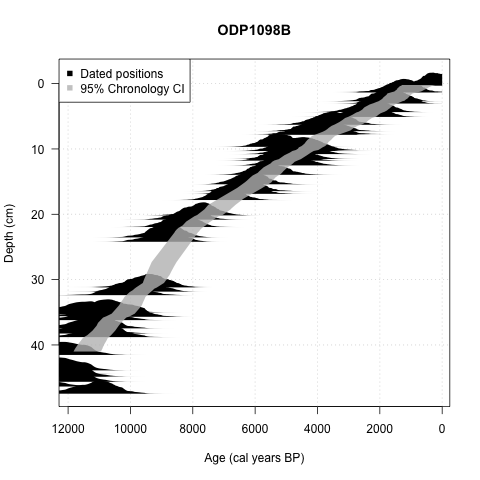

In [19]:
%%R

library(Bchron)
setwd(wd)
library("Bchron", lib.loc="/Library/Frameworks/R.framework/Versions/3.2/Resources/library")
radiocarbon_data <- read.delim(radio_text)
depth_data <- read.table(depth_text, quote="\"")
run=Bchronology(ages=radiocarbon_data$ages,ageSds=radiocarbon_data$ageSds, 
                calCurves=radiocarbon_data$CalCurves,positions=radiocarbon_data$position,
                predictPositions=depth_data$V1,iterations=iter,extractDate=max_t)
plot(run,main=record_name,xlab='Age (cal years BP)',ylab='Depth (cm)',las=1)

Save the output of the chronology into text files

In [23]:
import pandas.rpy.common as com

run = com.load_data('run')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


# Progammers' corner

Look at the variables. Refresh the cell as you open/close/rerun the Notebook

In [22]:
whos


Variable                Type                  Data/Info
-------------------------------------------------------
ACTIVE                  str                   active
ALL                     str                   all
ANCHOR                  str                   anchor
APPLICATION_NAME        str                   lipd
ARC                     str                   arc
BASELINE                str                   baseline
BEVEL                   str                   bevel
BOTH                    str                   both
BOTTOM                  str                   bottom
BROWSE                  str                   browse
BUTT                    str                   butt
BaseWidget              type                  <class 'tkinter.BaseWidget'>
BitmapImage             type                  <class 'tkinter.BitmapImage'>
BooleanVar              type                  <class 'tkinter.BooleanVar'>
Button                  type                  <class 'tkinter.Button'>
CASCADE            

In [24]:
run

{'ageScaleVal': [1000.0],
 'calAges': {'date1': {'ageGrid': [0.0,
    1.0,
    2.0,
    3.0,
    4.0,
    5.0,
    6.0,
    7.0,
    8.0,
    9.0,
    10.0,
    11.0,
    12.0,
    13.0,
    14.0,
    15.0,
    16.0,
    17.0,
    18.0,
    19.0,
    20.0,
    21.0,
    22.0,
    23.0,
    24.0,
    25.0,
    26.0,
    27.0,
    28.0,
    29.0,
    30.0,
    31.0,
    32.0,
    33.0,
    34.0,
    35.0,
    36.0,
    37.0,
    38.0,
    39.0,
    40.0,
    41.0,
    42.0,
    43.0,
    44.0,
    45.0,
    46.0,
    47.0,
    48.0,
    49.0,
    50.0,
    51.0,
    52.0,
    53.0,
    54.0,
    55.0,
    56.0,
    57.0,
    58.0,
    59.0,
    60.0,
    61.0,
    62.0,
    63.0,
    64.0,
    65.0,
    66.0,
    67.0,
    68.0,
    69.0,
    70.0,
    71.0,
    72.0,
    73.0,
    74.0,
    75.0,
    76.0,
    77.0,
    78.0,
    79.0,
    80.0,
    81.0,
    82.0,
    83.0,
    84.0,
    85.0,
    86.0,
    87.0,
    88.0,
    89.0,
    90.0,
    91.0,
    92.0,
    93.0,
    94.0,
   